# Electric Generating Capacity in Illinois

This notebook processes data from EIA about all electricity generation in the United States.
We only care about data for Illinois, however.

Data can be found [here](https://www.eia.gov/electricity/data/eia860/) or [here](https://www.eia.gov/electricity/data/eia860M/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
months = ['january',
          'february',
          'march',
          'april',
          'may',
          'june',
          'july',
          'august',
          'september',
          'october',
          'november',
          'december']

In [3]:
url = "https://www.eia.gov/electricity/data/eia860m/archive/xls/december_generator2020.xlsx"
df = pd.read_excel(url, sheet_name='Operating', skipfooter=2, skiprows=2)

In [4]:
illinois_mask = df.iloc[:,5] == 'IL'

In [5]:
illinois_plants = df[illinois_mask]

In [6]:
techs = np.unique(np.array(illinois_plants['Technology']))
techs

array(['All Other', 'Batteries', 'Conventional Hydroelectric',
       'Conventional Steam Coal', 'Landfill Gas',
       'Natural Gas Fired Combined Cycle',
       'Natural Gas Fired Combustion Turbine',
       'Natural Gas Internal Combustion Engine',
       'Natural Gas Steam Turbine', 'Nuclear', 'Onshore Wind Turbine',
       'Other Gases', 'Other Waste Biomass', 'Petroleum Liquids',
       'Solar Photovoltaic'], dtype=object)

In [7]:
re_techs = ['Batteries','Conventional Hydroelectric', '']

In [10]:
for t in techs:
    print(t)
    df = illinois_plants[illinois_plants['Technology'] == t]
    columns = ['Plant Name', 'Nameplate Capacity (MW)', 'Operating Year','Status']
    print(df[columns])
    print('/**************************************************************************/')    
    print('/**************************************************************************/')    
    print('/**************************************************************************/')

All Other
               Plant Name  Nameplate Capacity (MW)  Operating Year  \
15495  Granite City Works                     78.0            2010   

               Status  
15495  (OP) Operating  
/**************************************************************************/
/**************************************************************************/
/**************************************************************************/
Batteries
                                   Plant Name  Nameplate Capacity (MW)  \
15862     FPL Energy Illinois Wind LLC Hybrid                     20.0   
19260            Grand Ridge Battery Projects                      1.5   
19261            Grand Ridge Battery Projects                     31.5   
19263            Elwood Energy Storage Center                     19.8   
19264              Jake Energy Storage Center                     19.8   
19965                 McHenry Battery Storage                     19.8   
21529  TAC-Distributed Energy Resource Hyb

## Illinois Coal Capacity

In [11]:
coaldf = illinois_plants[illinois_plants['Technology'] == 'Conventional Steam Coal']
columns = ['Plant Name', 'Nameplate Capacity (MW)', 'Operating Year','Status']
sorted_coaldf = coaldf[columns].sort_values(by=['Operating Year'])
sorted_coaldf

,Plant Name,Nameplate Capacity (MW),Operating Year,Status
1482,Joppa Steam,183.3,1953,(OP) Operating
1481,Joppa Steam,183.3,1953,(OP) Operating
1483,Joppa Steam,183.3,1954,(OP) Operating
1484,Joppa Steam,183.3,1954,(OP) Operating
1486,Joppa Steam,183.3,1955,(OP) Operating
1485,Joppa Steam,183.3,1955,(OP) Operating
1470,Waukegan,326.4,1958,(OP) Operating
1471,Waukegan,355.3,1962,(OP) Operating
1676,Marion,33.0,1963,(OP) Operating
1677,Marion,33.0,1963,(OP) Operating


In [12]:
np.unique(np.array(coaldf['Operating Year']))

array([1953, 1954, 1955, 1958, 1962, 1963, 1967, 1968, 1970, 1972, 1973,
       1975, 1977, 1978, 1987, 1989, 1991, 1994, 1997, 1998, 2005, 2009,
       2012])

In [31]:
# Remove the capacity of the any facility which is out of service.
os_cap = coaldf['Nameplate Capacity (MW)'].where(coaldf['Status'].str.contains("OS")).sum()
coaldf['Nameplate Capacity (MW)'].sum() - os_cap

10929.5

In [32]:
capacity = np.array(sorted_coaldf['Nameplate Capacity (MW)'])
years = np.array(sorted_coaldf['Operating Year'])

simple_df = pd.DataFrame({'installed':capacity}, index=years)
simple_df.index = pd.to_datetime(simple_df.index, format='%Y')

In [33]:
simple_df = simple_df.resample('Y').sum()

In [34]:
simple_df['capacity'] = simple_df['installed'].cumsum()

In [35]:
simple_df

,installed,capacity
1953-12-31,366.6,366.6
1954-12-31,366.6,733.2
1955-12-31,366.6,1099.8
1956-12-31,0.0,1099.8
1957-12-31,0.0,1099.8
1958-12-31,326.4,1426.2
1959-12-31,0.0,1426.2
1960-12-31,0.0,1426.2
1961-12-31,0.0,1426.2
1962-12-31,355.3,1781.5


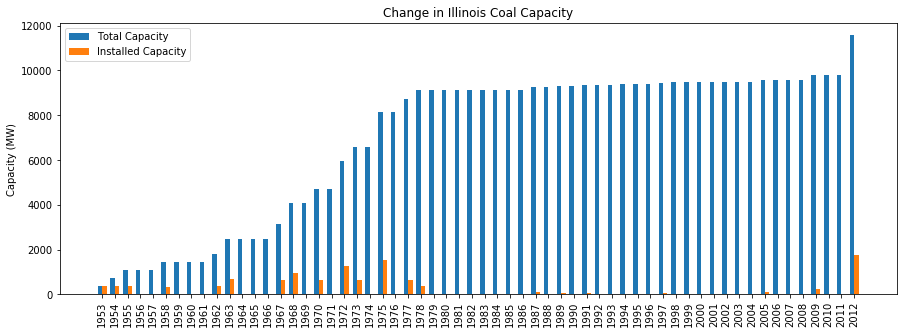

In [36]:
fig, ax = plt.subplots(figsize=(15,5))
years = np.arange(1953,2013,1)
width = 0.35
rects1 = ax.bar(years - width/2, simple_df.capacity, width, label='Total Capacity')
rects2 = ax.bar(years + width/2, simple_df.installed, width, label='Installed Capacity')
ax.set_ylabel('Capacity (MW)')
ax.set_title('Change in Illinois Coal Capacity')
ax.set_xticks(years)
plt.xticks(rotation='vertical')
ax.legend()
plt.show()

## Illinois Natural Gas Capacity

In [37]:
natgas = "Natural Gas"
ng_techs = [val for val in techs if natgas in val]
ng_techs

['Natural Gas Fired Combined Cycle',
 'Natural Gas Fired Combustion Turbine',
 'Natural Gas Internal Combustion Engine',
 'Natural Gas Steam Turbine']

In [38]:
test = 'Natural Gas Steam Turbine'
test in ng_techs

True

In [39]:
ng_mask = ((illinois_plants['Technology'] == ng_techs[0]) |
           (illinois_plants['Technology'] == ng_techs[1]) | 
           (illinois_plants['Technology'] == ng_techs[3]) |
           (illinois_plants['Technology'] == ng_techs[3])
           )

In [40]:
natgas_df = illinois_plants[ng_mask]
columns = ['Plant Name', 'Nameplate Capacity (MW)', 'Operating Year','Status']
sorted_natgas_df = natgas_df[columns].sort_values(by=['Operating Year'])
sorted_natgas_df

,Plant Name,Nameplate Capacity (MW),Operating Year,Status
11648,University of Illinois Abbott Power Plt,3.0,1940,(OP) Operating
11652,University of Illinois Abbott Power Plt,3.0,1940,(OP) Operating
1672,Winnetka,6.3,1948,(OP) Operating
11653,University of Illinois Abbott Power Plt,3.0,1948,(OP) Operating
1455,Grand Tower Energy Center LLC,80.9,1951,(OP) Operating
...,...,...,...,...
12339,Nelson Energy Center,133.1,2015,(OP) Operating
12338,Nelson Energy Center,179.4,2015,(OP) Operating
8030,Alsey,48.0,2016,(OP) Operating
20090,Argonne National Laboratory CHP,6.3,2016,(OP) Operating


In [45]:
sorted_natgas_df['Nameplate Capacity (MW)'].sum()

18623.5

In [46]:
capacity = np.array(sorted_natgas_df['Nameplate Capacity (MW)'])
years = np.array(sorted_natgas_df['Operating Year'])

simple_df = pd.DataFrame({'installed':capacity}, index=years)
simple_df.index = pd.to_datetime(simple_df.index, format='%Y')
simple_df = simple_df.resample('Y').sum()
simple_df['capacity'] = simple_df['installed'].cumsum()

In [47]:
simple_df

,installed,capacity
1940-12-31,6.0,6.0
1941-12-31,0.0,6.0
1942-12-31,0.0,6.0
1943-12-31,0.0,6.0
1944-12-31,0.0,6.0
...,...,...
2015-12-31,627.5,18567.4
2016-12-31,54.3,18621.7
2017-12-31,0.0,18621.7
2018-12-31,0.0,18621.7


In [48]:
simple_df.to_csv('../../data/EIA/illinois_naturalgas_capacity.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../../data/EIA/illinois_naturalgas_capacity.csv'

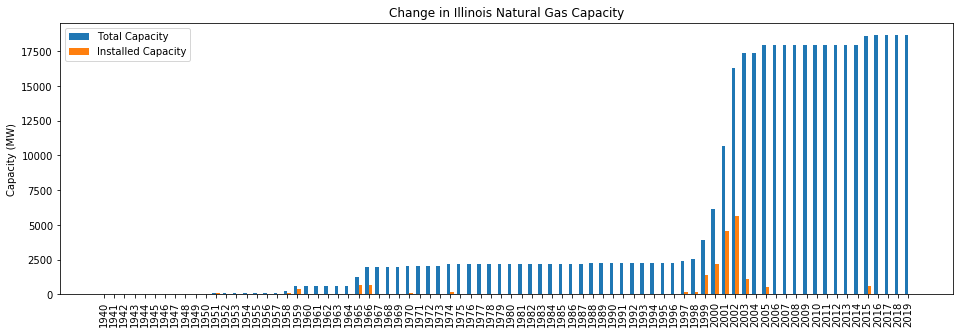

In [49]:
fig, ax = plt.subplots(figsize=(16,5))
years = np.arange(1940,2020,1)
width = 0.35
rects1 = ax.bar(years - width/2, simple_df.capacity, width, label='Total Capacity')
rects2 = ax.bar(years + width/2, simple_df.installed, width, label='Installed Capacity')
ax.set_ylabel('Capacity (MW)')
ax.set_title('Change in Illinois Natural Gas Capacity')
ax.set_xticks(years)
plt.xticks(rotation='vertical')
ax.legend()
plt.show()

In [50]:
np.unique(np.array(natgas_df['Operating Year']))

array([1940, 1948, 1951, 1953, 1958, 1959, 1960, 1962, 1965, 1966, 1970,
       1974, 1985, 1987, 1988, 1990, 1991, 1993, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2012, 2015, 2016, 2019])

## Solar Power

In [51]:
solar = 'Solar Photovoltaic'
solardf = illinois_plants[illinois_plants['Technology'] == solar]
columns = ['Plant Name', 'Nameplate Capacity (MW)', 'Operating Year','Status']
sorted_solardf = solardf[columns].sort_values(by=['Operating Year'])
sorted_solardf

,Plant Name,Nameplate Capacity (MW),Operating Year,Status
15634,Exelon Solar Chicago,9.0,2009,(OP) Operating
16673,Grand Ridge Solar Farm,20.0,2012,(OP) Operating
17740,Rockford Solar Farm,2.6,2012,(OP) Operating
1630,North Ninth Street,0.3,2014,(OP) Operating
1558,Geneseo,1.2,2015,(OP) Operating
22250,Phoenix Solar South Farms LLC Solar Farm,4.7,2015,(OP) Operating
21968,Rantoul Solar,1.0,2016,(OP) Operating
20563,IKEA Joliet Rooftop PV System,2.0,2017,(OP) Operating
21531,TAC-Distributed Energy Resource Hybrid,0.1,2017,(OP) Operating
21415,John A Logan College Solar,1.9,2019,(OP) Operating


In [52]:
sorted_solardf['Nameplate Capacity (MW)'].sum()

116.3

In [53]:
capacity = np.array(sorted_solardf['Nameplate Capacity (MW)'])
years = np.array(sorted_solardf['Operating Year'])

simple_df = pd.DataFrame({'installed':capacity}, index=years)
simple_df.index = pd.to_datetime(simple_df.index, format='%Y')
simple_df = simple_df.resample('Y').sum()
simple_df['capacity'] = simple_df['installed'].cumsum()

In [54]:
simple_df

,installed,capacity
2009-12-31,9.0,9.0
2010-12-31,0.0,9.0
2011-12-31,0.0,9.0
2012-12-31,22.6,31.6
2013-12-31,0.0,31.6
2014-12-31,0.3,31.9
2015-12-31,5.9,37.8
2016-12-31,1.0,38.8
2017-12-31,2.1,40.9
2018-12-31,0.0,40.9


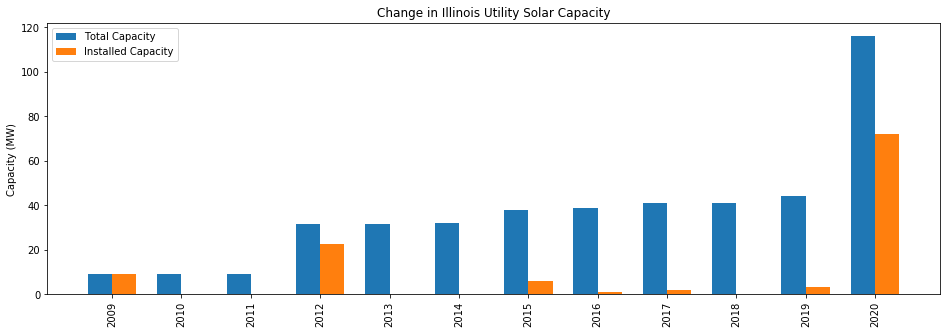

In [55]:
fig, ax = plt.subplots(figsize=(16,5))
years = np.arange(2009,2021,1)
width = 0.35
rects1 = ax.bar(years - width/2, simple_df.capacity, width, label='Total Capacity')
rects2 = ax.bar(years + width/2, simple_df.installed, width, label='Installed Capacity')
ax.set_ylabel('Capacity (MW)')
ax.set_title('Change in Illinois Utility Solar Capacity')
ax.set_xticks(years)
plt.xticks(rotation='vertical')
ax.legend()
plt.show()

## Illinois Wind Power

In [56]:
wind = 'Onshore Wind Turbine'
winddf = illinois_plants[illinois_plants['Technology'] == wind]
columns = ['Plant Name', 'Nameplate Capacity (MW)', 'Operating Year','Status']
sorted_winddf = winddf[columns].sort_values(by=['Operating Year'])
sorted_winddf

,Plant Name,Nameplate Capacity (MW),Operating Year,Status
13686,"Mendota Hills, LLC",76.2,2003,(OA) Out of service but expected to return to ...
13900,Crescent Ridge,53.0,2005,(OP) Operating
14018,Pike County Wind Power,1.7,2005,(OP) Operating
13963,High Trail Wind Farm LLC,198.0,2007,(OP) Operating
14048,Agriwind,8.4,2007,(OP) Operating
14106,GSG LLC,80.0,2007,(OP) Operating
14414,Old Trail Wind Farm,198.0,2007,(OP) Operating
14439,Camp Grove Wind Farm,150.0,2007,(OP) Operating
18044,Com Adam 1WF-1,2.5,2007,(OA) Out of service but expected to return to ...
18045,Com Adam 1WF-1,2.5,2007,(OP) Operating


In [57]:
capacity = np.array(sorted_winddf['Nameplate Capacity (MW)'])
years = np.array(sorted_winddf['Operating Year'])

simple_df = pd.DataFrame({'installed':capacity}, index=years)
simple_df.index = pd.to_datetime(simple_df.index, format='%Y')
simple_df = simple_df.resample('Y').sum()
simple_df['capacity'] = simple_df['installed'].cumsum()

In [58]:
simple_df

,installed,capacity
2003-12-31,76.2,76.2
2004-12-31,0.0,76.2
2005-12-31,54.7,130.9
2006-12-31,0.0,130.9
2007-12-31,639.4,770.3
2008-12-31,171.0,941.3
2009-12-31,634.5,1575.8
2010-12-31,500.0,2075.8
2011-12-31,692.3,2768.1
2012-12-31,809.2,3577.3


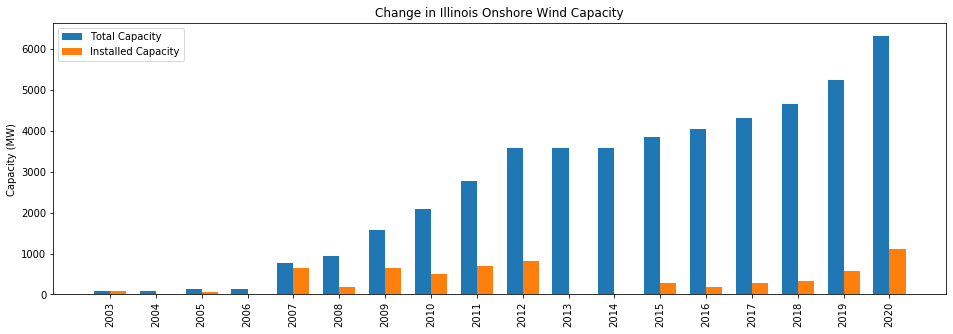

In [59]:
fig, ax = plt.subplots(figsize=(16,5))
years = np.arange(2003,2021,1)
width = 0.35
rects1 = ax.bar(years - width/2, simple_df.capacity, width, label='Total Capacity')
rects2 = ax.bar(years + width/2, simple_df.installed, width, label='Installed Capacity')
ax.set_ylabel('Capacity (MW)')
ax.set_title('Change in Illinois Onshore Wind Capacity')
ax.set_xticks(years)
plt.xticks(rotation='vertical')
ax.legend()
plt.show()

## Battery Storage

In [60]:
battery = 'Batteries'
batterydf = illinois_plants[illinois_plants['Technology'] == battery]
columns = ['Plant Name', 'Nameplate Capacity (MW)', 'Operating Year','Status']
sorted_batterydf = batterydf[columns].sort_values(by=['Operating Year'])
sorted_batterydf

,Plant Name,Nameplate Capacity (MW),Operating Year,Status
19260,Grand Ridge Battery Projects,1.5,2013,(OP) Operating
15862,FPL Energy Illinois Wind LLC Hybrid,20.0,2014,(OP) Operating
19261,Grand Ridge Battery Projects,31.5,2015,(OP) Operating
19263,Elwood Energy Storage Center,19.8,2015,(OP) Operating
19264,Jake Energy Storage Center,19.8,2015,(OP) Operating
19965,McHenry Battery Storage,19.8,2016,(OP) Operating
21529,TAC-Distributed Energy Resource Hybrid,0.3,2017,(OP) Operating
22325,Marengo Battery Storage LLC,20.0,2018,(OP) Operating


In [61]:
capacity = np.array(sorted_batterydf['Nameplate Capacity (MW)'])
years = np.array(sorted_batterydf['Operating Year'])

simple_df = pd.DataFrame({'installed':capacity}, index=years)
simple_df.index = pd.to_datetime(simple_df.index, format='%Y')
simple_df = simple_df.resample('Y').sum()
simple_df['capacity'] = simple_df['installed'].cumsum()

In [62]:
simple_df

,installed,capacity
2013-12-31,1.5,1.5
2014-12-31,20.0,21.5
2015-12-31,71.1,92.6
2016-12-31,19.8,112.4
2017-12-31,0.3,112.7
2018-12-31,20.0,132.7


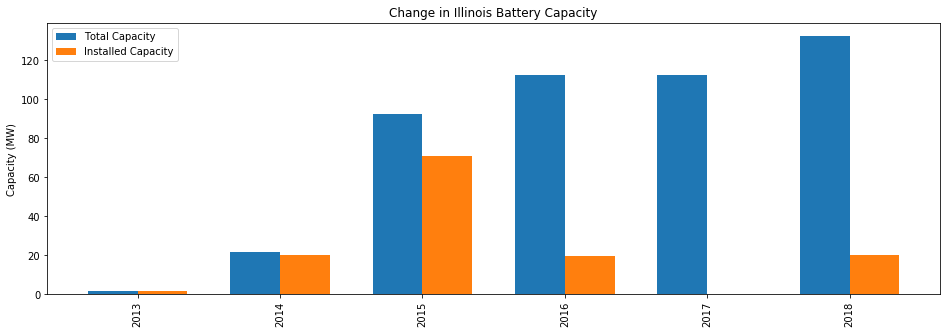

In [63]:
fig, ax = plt.subplots(figsize=(16,5))
years = np.arange(2013,2019,1)
width = 0.35
rects1 = ax.bar(years - width/2, simple_df.capacity, width, label='Total Capacity')
rects2 = ax.bar(years + width/2, simple_df.installed, width, label='Installed Capacity')
ax.set_ylabel('Capacity (MW)')
ax.set_title('Change in Illinois Battery Capacity')
ax.set_xticks(years)
plt.xticks(rotation='vertical')
ax.legend()
plt.show()